In [1]:
# Utilize libraires import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance, plot_tree
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
import shap


In [17]:
# Giving two options for file download and mounting personal G Drive for file upload option

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [18]:
# Giving initialized data view of the cleaned metadata set as it contains most pertinent information from all the files. We attempted to merge all cleaned files provided but were unable to due lack of computing resources available.

estate_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/cleaned_metadata.csv')
dataset_info = estate_df.info()
summary_stats = estate_df.describe()
estate_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1636 non-null   object 
 5   sub_primaryspaceusage  1636 non-null   object 
 6   sqm                    1636 non-null   float64
 7   sqft                   1636 non-null   float64
 8   lat                    1636 non-null   float64
 9   lng                    1636 non-null   float64
 10  timezone               1636 non-null   object 
 11  electricity            1636 non-null   object 
 12  water                  1636 non-null   object 
 13  irrigation             1636 non-null   object 
 14  gas                    1636 non-null   object 
 15  year

,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,water,irrigation,gas,yearbuilt,eui,leed_level
0,Panther_lodging_Dean,Panther,NaN,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,US/Eastern,Unknown,Unknown,Yes,Yes,1989.0,271.0,Unknown
1,Panther_lodging_Shelia,Panther,NaN,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,US/Eastern,Unknown,Unknown,Yes,Unknown,1992.0,62.0,Unknown
2,Panther_lodging_Ricky,Panther,NaN,0.0,Lodging/residential,Residence Hall,483.1,5200.0,28.517689,-81.379039,US/Eastern,Unknown,Unknown,Yes,Yes,2016.0,534.0,Unknown
3,Panther_education_Rosalie,Panther,0.0,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,US/Eastern,Yes,Yes,Unknown,Unknown,2008.0,276.0,Unknown
4,Panther_education_Misty,Panther,1.0,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,US/Eastern,Yes,Yes,Unknown,Unknown,2004.0,375.0,Unknown
5,Panther_office_Daina,Panther,NaN,0.0,Office,Office,133.8,1440.0,28.517689,-81.379039,US/Eastern,Unknown,Yes,Yes,Unknown,1983.0,1983.0,Unknown
6,Panther_education_Mattie,Panther,2.0,0.0,Education,Classroom,499.4,5376.0,28.517689,-81.379039,US/Eastern,Yes,Yes,Unknown,Unknown,1991.0,49.0,Unknown
7,Panther_office_Woodrow,Panther,NaN,0.0,Office,Office,537.8,5789.0,28.517689,-81.379039,US/Eastern,Unknown,Yes,Yes,Unknown,1996.0,136.0,Unknown
8,Panther_education_Diann,Panther,3.0,0.0,Education,Classroom,2200.4,23685.0,28.517689,-81.379039,US/Eastern,Yes,Yes,Unknown,Unknown,2002.0,145.0,Unknown
9,Panther_education_Gina,Panther,4.0,0.0,Education,Research,10833.1,116607.0,28.517689,-81.379039,US/Eastern,Yes,Yes,Unknown,Yes,1975.0,546.0,Unknown


In [ ]:
# Creating Xgboost model from Metadata CSV

# Drop ID columns
#estate_df = estate_df.drop(columns=['building_id', 'building_id_kaggle', 'site_id_kaggle'])


# Separate X and y
X = estate_df.drop(columns=['eui'])
y = estate_df['eui']

# Handle categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_numerical = X[numerical_cols].values
X_final = np.hstack((X_numerical, X_encoded))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBRegressor(random_state=42, n_estimators=20, verbosity=0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAPE: {mape * 100:.2f}%")


Test RMSE: 69.69
Test MAPE: 15.70%


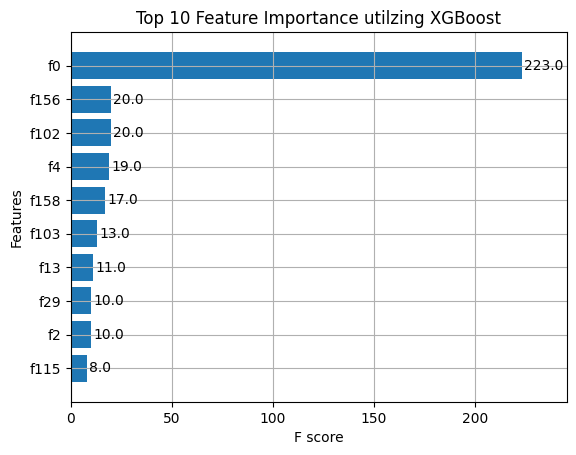

In [ ]:
# Visualize featrure importance
plot_importance(model, max_num_features=10, height=0.8)
plt.title("Top 10 Feature Importance utilzing XGBoost")
plt.show()

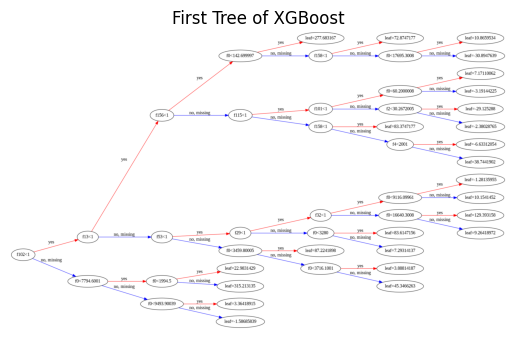

In [ ]:
# Visualize Tree
plot_tree(model, num_trees=0, rankdir='LR')
plt.title("First Tree of XGBoost")
plt.show()

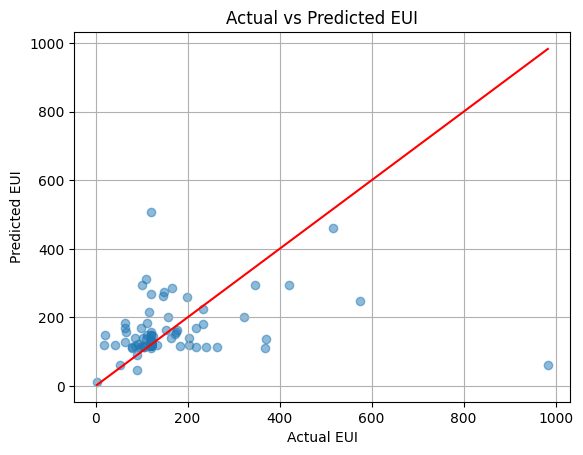

In [ ]:
# Actual vs Predicted Scatter Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual EUI')
plt.ylabel('Predicted EUI')
plt.title('Actual vs Predicted EUI')
plt.grid(True)
plt.show()

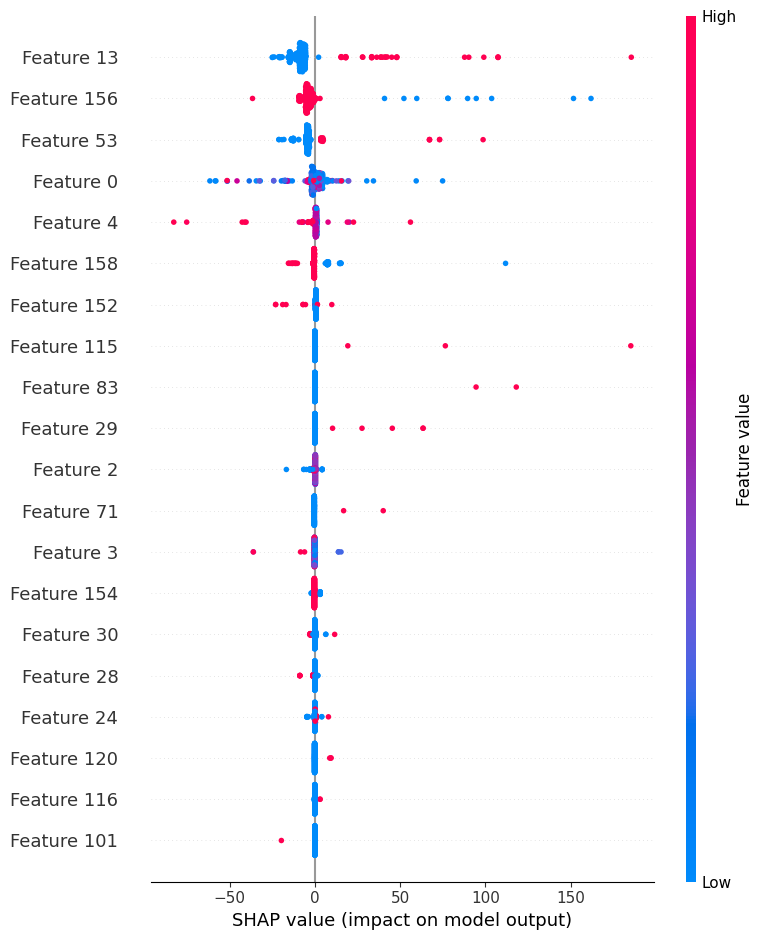

In [ ]:
# SHAP Summary Plot
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, show=True)

Saving cleaned_metadata.csv to cleaned_metadata (7).csv
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 30.5875 - mae: 5.4913 - val_loss: 28.2870 - val_mae: 5.3058
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 28.3888 - mae: 5.2922 - val_loss: 26.7507 - val_mae: 5.1593
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 25.5321 - mae: 5.0164 - val_loss: 25.5494 - val_mae: 5.0424
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 23.3660 - mae: 4.8061 - val_loss: 24.3655 - val_mae: 4.9261
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 21.4394 - mae: 4.5964 - val_loss: 23.1776 - val_mae: 4.8060
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 20.1446 - mae: 4.4486 - val_loss: 22.0088 - val_mae: 4.6842
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 19.1285 - mae: 4.3338 - val_loss: 20.8266 - val_mae: 4.5569
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 18.2668 - mae: 4.2320 - val_loss: 19.6926 - val_mae: 4.4308

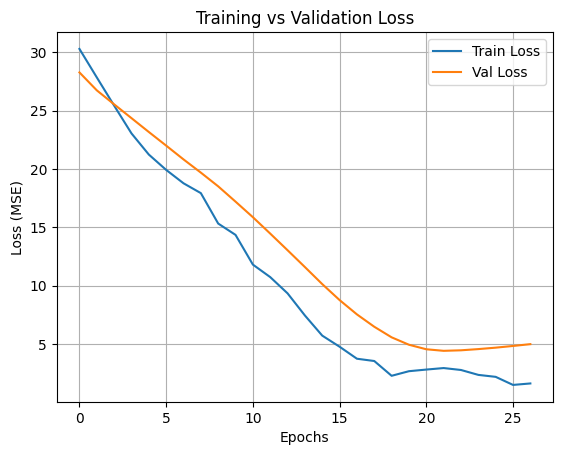

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Test MAE: 126.38
Test RMSE: 160.29
Test R² Score: -1.5227


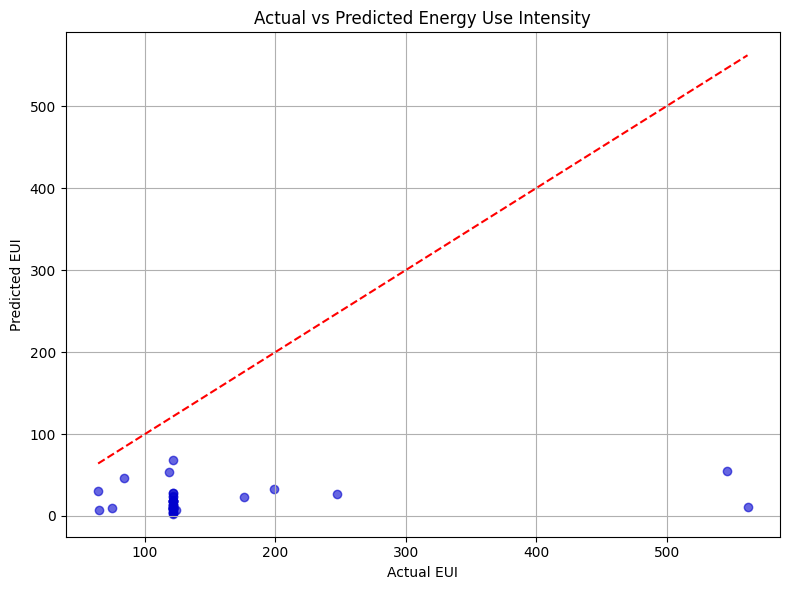

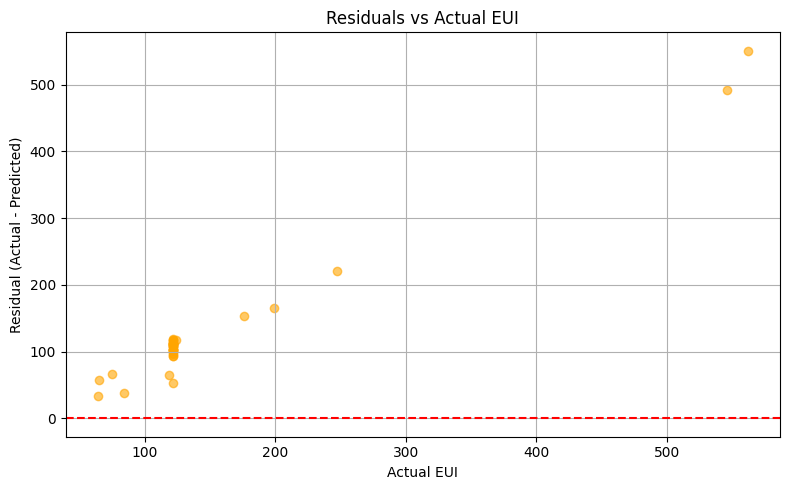

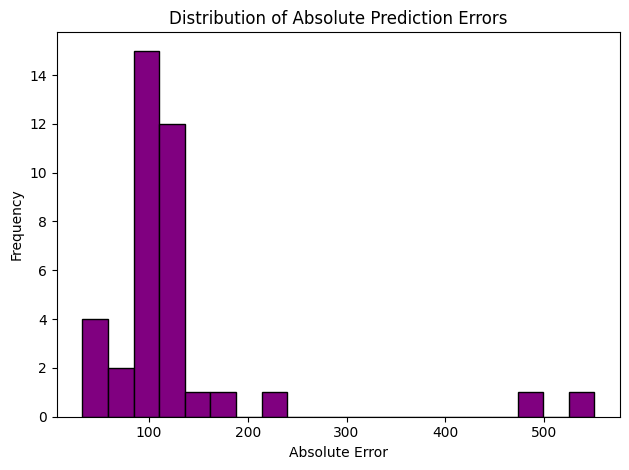

🔍 Top 5 largest prediction errors:
     Actual  Predicted  Absolute Error
54    562.0  11.268605      550.731395
9     546.0  54.692101      491.307899
102   247.0  26.456352      220.543648
31    199.0  33.118786      165.881214
55    176.0  23.306376      152.693624


In [ ]:
# Implementing Neural Netork Model
# Adding in Log-Target, SHAP-ready set up for better visualization
# === Upload the cleaned_metadata.csv file ===
from google.colab import files
uploaded = files.upload()

# === Load and clean data ===
import pandas as pd
import numpy as np

df = pd.read_csv("cleaned_metadata.csv")

# Drop invalid EUI values
df = df[df["eui"].notna() & (df["eui"] >= 0)]

# Filter only where key features are known
for col in ["primaryspaceusage", "electricity", "gas"]:
    df = df[df[col] != "Unknown"]

# Define features and log-transformed target
X = df.drop(columns=["eui"])
y_log = np.log1p(df["eui"])  # log(1 + eui)

# Encode features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_numerical = X[numerical_cols].values

X_final = np.hstack((X_numerical, X_encoded))

# Clean and scale features
X_df = pd.DataFrame(X_final)
X_df.replace([np.inf, -np.inf], np.nan, inplace=True)
X_df.dropna(inplace=True)
y_log = y_log.iloc[X_df.index]
X_final = X_df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.3, random_state=42)

# === Define the neural network ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_log,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === Evaluate model ===
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# === Predict and reverse log scale ===
y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# === Metrics ===
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.4f}")

# === Plots ===
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual EUI')
plt.ylabel('Predicted EUI')
plt.title('Actual vs Predicted Energy Use Intensity')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual EUI")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual EUI")
plt.grid(True)
plt.tight_layout()
plt.show()

# Error histogram
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=20, color='purple', edgecolor='black')
plt.title("Distribution of Absolute Prediction Errors")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Top 5 worst predictions
error_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Absolute Error": errors
})
top_errors = error_df.sort_values("Absolute Error", ascending=False).head(5)
print("🔍 Top 5 largest prediction errors:")
print(top_errors)
